In [1]:
import numpy as np
import pandas as pd

In [2]:
from utils import load_airtable, load_table_as_df # for data loading 
from utils import plot_coded_column, DEFAULT_COLOR, DEFAULT_SIZE # for visualizations

# What is in DAO constitutions?
This notebook visualizes data collected in [Metagov's](https://metagov.org/) [Govbase](https://govbase.metagov.org/) database. The data set contains coded data describing the content and structure of 19+ governance documents for Web3 organization.

For the full writeup and resulting constitutional guide and template, check out the [Constitutions of Web3 website](https://constitutions.metagov.org/).

## Import coded data from Govbase
Import [Constitutional Model table](https://airtable.com/shrgnUrj0dqzZDsOd/tbltBIhUFqZE1tfle) and link related project information from the [Projects table](https://airtable.com/shrgnUrj0dqzZDsOd/tblvk3EFzcoCFvXXi/viwh2YRhXF7Xq54mm).

In [3]:
# Load DAO constitutions data from Constitutional Model table in Govbase
at = load_airtable()
df = load_table_as_df(at, 'Constitutional Model')

In [4]:
# Load DAO ecosystem projects table to look up the DAO on-chain component project names
df_projects = load_table_as_df(at, 'Projects', kwargs={'view': 'DAO ecosystem projects'})
df['onchain'] = df['onchain'].apply(
    lambda values: [df_projects.at[v, 'Project name'] for v in values] if isinstance(values, list) else np.nan)

## Visualize what's in the constitutions

### Document structure

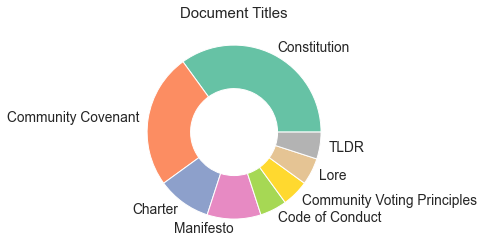

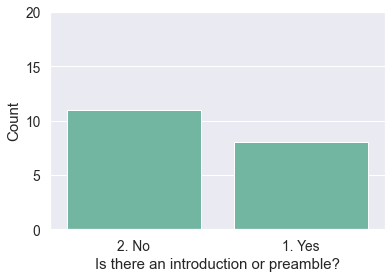

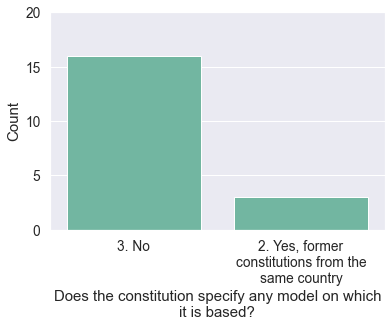

In [5]:
plot_coded_column(df, 'doctit', label='Document Titles', plotType='pie')
plot_coded_column(df, 'preamble', label='Is there an introduction or preamble?', orient='v')
plot_coded_column(df, 'model', label='Does the constitution specify any model on which it is based?', orient='v')

### Rights, values, and goals

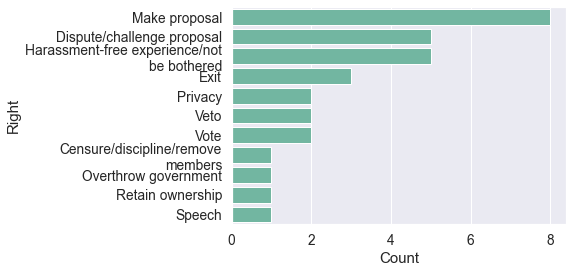

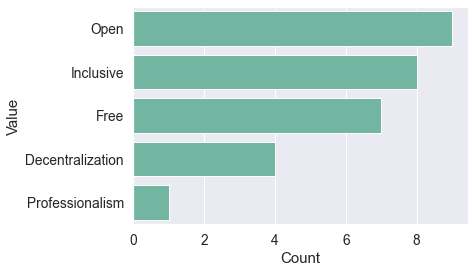

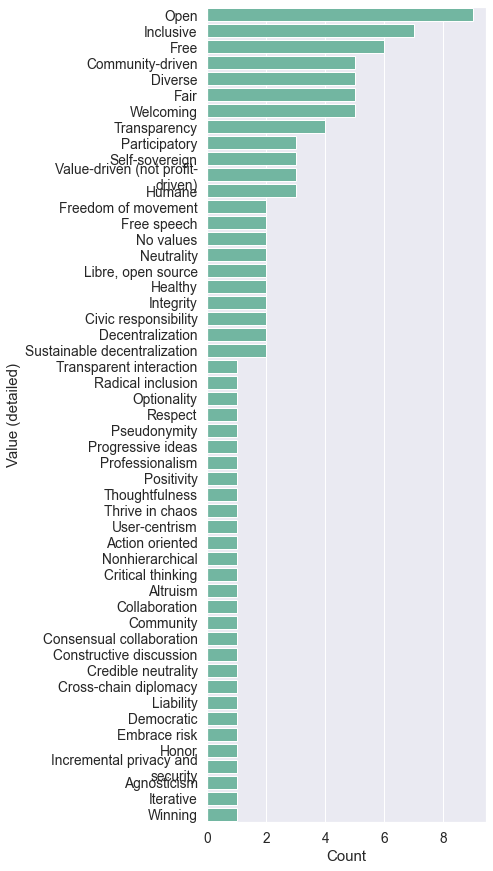

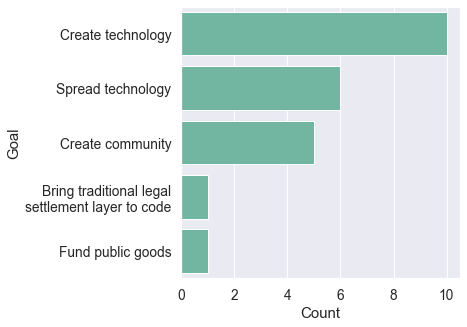

In [6]:
plot_coded_column(df, 'rights_coded', label='Right')
plot_coded_column(df, 'values_coded', label='Value')
plot_coded_column(df, 'values', label='Value (detailed)', size=(5,15))
plot_coded_column(df, 'goals_coded', label='Goal')

### Constitutional provisions

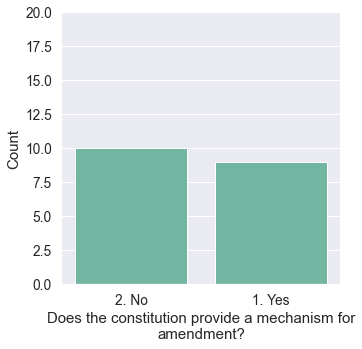

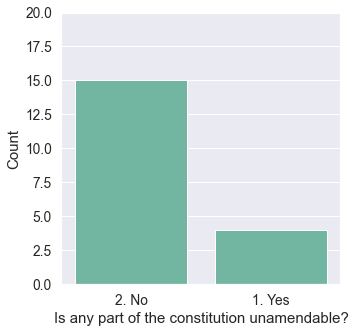

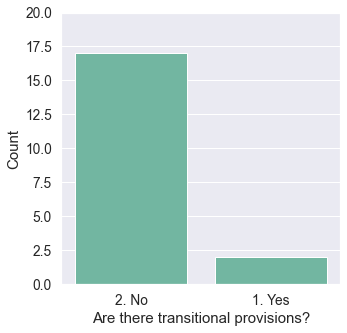

In [7]:
plot_coded_column(df, 'amend', label='Does the constitution provide a mechanism for amendment?', orient='v')
plot_coded_column(df, 'unamend', label='Is any part of the constitution unamendable?', orient='v')
plot_coded_column(df, 'transprov', label='Are there transitional provisions?', orient='v')

## Supplementary information
Not specified in constitution; drawn from other sources.

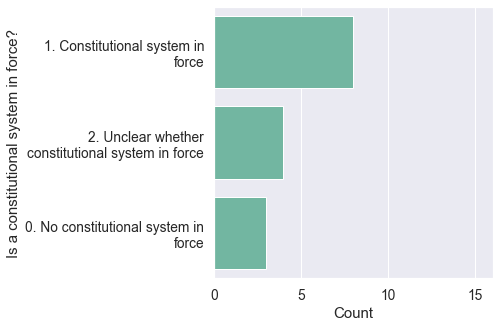

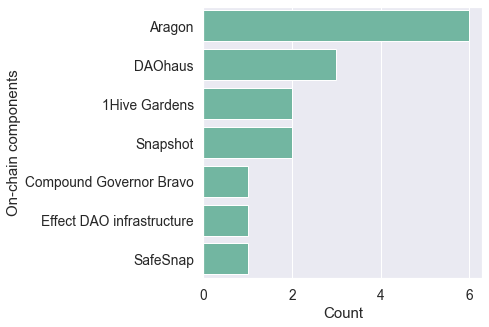

In [8]:
plot_coded_column(df, 'c_inforce', label='Is a constitutional system in force?')
plot_coded_column(df, 'onchain', label='On-chain components')